PROJECT DESCRIPTION

In the first part, you will use Python visualization libraries to systematically explore a selected dataset, starting from plots of single variables and building up to plots of multiple variables. In the second part, you will produce a short presentation that illustrates interesting properties, trends, and relationships that you discovered in your selected dataset. The primary method of conveying your findings will be through transforming your exploratory visualizations from the first part into polished, explanatory visualizations.

What will I learn? After completing this project, you will be able to:

Supplement statistics with visualizations to build understanding of data. Choose appropriate plots, limits, transformations, and aesthetics to explore a dataset, allowing you to understand distributions of variables and relationships between features. Use design principles to create effective visualizations for communicating findings to an audience

In [29]:
# import all necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [30]:
#Load dataset 
loan = pd.read_csv('python/data_viz project/prosperLoanData.csv')
pd.set_option('max_column', 100)
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [31]:
#Time to explore the general structure of our dataset inorder to find if it needs any cleaning 
loan.shape

#so our dataset has 113937 "initial" observations and 81 columns

(113937, 81)

In [32]:
#Loan information 
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

WHAT IS MY MAJOR INTEREST IN THE PROJECT?

my major interest is to find out factors that lead to loan default, which Prosper must avoid in order to remain in business and not incure heavy losses. 


In [33]:
#Values of the Loan status which is my dependent variable in the dataset 

loan.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

As a data preprocessing step, I will start by dealing with: 
    
Missing data first 

Structural issue second 

Quality issue third 

ACCESS 
Missing Data Issues 

COMBINE THE PROSPER RATING AND CREDIT GRADE COLUMN TOGETHER

This 'credit grade' column reveals similar information to the ‘Prosper rating’ column, and a value 
existing in ‘credit grade’ where there is no value for the Prosper rating. Therefore, these two columns should be 
combined together so that the values in 'credit grade' fills up the empty cells in 'prosper rating'. 

DELETE THE COLUMNS BELOW

The variables below have at least 75% missing values and thus will not contribute much to revealing information about the loans. 


DELETE THE CLOSED DATE COLUMN 

The closed data column reveals similar information to the loan status. that is, when a borrower has an outstanding amount they owe after the closed date of the loan, they have defaulted. Otherwise, their loan is still current or still a 'running loan'. 

Delete Group Key columns - since more than 80% of observations are missing

For every other variable(s) with missing values, I will delete the rows with these missing values. 



In [34]:
#data cleaning phase 
loan_clean = loan.copy()

Define

use the fillna() function to insert the values from credit Grade in the empty cells in Prosper rating

In [35]:
#Code
loan_clean['ProsperRating (Alpha)'].fillna(loan_clean['CreditGrade'], inplace = True)

In [36]:
#Test
loan_clean['ProsperRating (Alpha)'].head(12)

0      C
1      A
2     HR
3      A
4      D
5      B
6      E
7      C
8     AA
9     AA
10     C
11     C
Name: ProsperRating (Alpha), dtype: object

Define 

Delete all columns with less than 25% observations using the .dropna() function 

In [37]:
#Code
loan_clean = loan_clean.dropna(axis = 1, thresh = int(0.25 * len(loan)))

In [38]:
#Test
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 71 columns):
ListingKey                            113937 non-null object
ListingNumber                         113937 non-null int64
ListingCreationDate                   113937 non-null object
CreditGrade                           28953 non-null object
Term                                  113937 non-null int64
LoanStatus                            113937 non-null object
ClosedDate                            55089 non-null object
BorrowerAPR                           113912 non-null float64
BorrowerRate                          113937 non-null float64
LenderYield                           113937 non-null float64
EstimatedEffectiveYield               84853 non-null float64
EstimatedLoss                         84853 non-null float64
EstimatedReturn                       84853 non-null float64
ProsperRating (numeric)               84853 non-null float64
ProsperRating (Alpha)               

Define 

Delete ClosedDate, CreditGrade, ProsperRating (numeric) columns using the drop() function 


In [39]:
#code
loan_clean.drop(['ClosedDate', 'CreditGrade'], axis = 1, inplace = True)

In [40]:
#Test
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 69 columns):
ListingKey                            113937 non-null object
ListingNumber                         113937 non-null int64
ListingCreationDate                   113937 non-null object
Term                                  113937 non-null int64
LoanStatus                            113937 non-null object
BorrowerAPR                           113912 non-null float64
BorrowerRate                          113937 non-null float64
LenderYield                           113937 non-null float64
EstimatedEffectiveYield               84853 non-null float64
EstimatedLoss                         84853 non-null float64
EstimatedReturn                       84853 non-null float64
ProsperRating (numeric)               84853 non-null float64
ProsperRating (Alpha)                 113806 non-null object
ProsperScore                          84853 non-null float64
ListingCategory (numeric)         

Define 

for every other variables with some missing values in them, I will delete the obervations and not fill with mean or median since the amount of missing values are more than 7% . 

I will remove the observations using the dropna() function 

In [41]:
#Code
loan_clean = loan_clean.dropna(subset = ['PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 
                            'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'DebtToIncomeRatio', 
                            'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 
                            'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'FirstRecordedCreditLine', 'CurrentCreditLines', 
                            'OpenCreditLines', 'TotalCreditLinespast7years', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 
                            'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (Alpha)', 
                            'ProsperScore', 'BorrowerAPR'], axis = 0)

In [42]:
#Test
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76216 entries, 1 to 113936
Data columns (total 69 columns):
ListingKey                            76216 non-null object
ListingNumber                         76216 non-null int64
ListingCreationDate                   76216 non-null object
Term                                  76216 non-null int64
LoanStatus                            76216 non-null object
BorrowerAPR                           76216 non-null float64
BorrowerRate                          76216 non-null float64
LenderYield                           76216 non-null float64
EstimatedEffectiveYield               76216 non-null float64
EstimatedLoss                         76216 non-null float64
EstimatedReturn                       76216 non-null float64
ProsperRating (numeric)               76216 non-null float64
ProsperRating (Alpha)                 76216 non-null object
ProsperScore                          76216 non-null float64
ListingCategory (numeric)             76216 

Define 

I will use the filter() function to select all necessary columns I will be working with 

In [43]:
#Code
#I will use the filter to select all the necessary columns I will work with 
loan_viz = loan_clean.filter(['CreditGrade', 'ProsperRating (numeric)','Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate','EstimatedEffectiveYield', 'ProsperRating (Alpha)', 
                   'ProsperScore', 'ListingCategory', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
                   'IsBorrowerHomeowner', 'CurrentlyInGroup', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies',
                   'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'BankcardUtilization', 
                   'TotalTrades', 'TradesNeverDelinquent', 'TradesOpenedLast6Months', 'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable',
                   'TotalProsperLoans', 'PercentFunded', 'LoanOriginalAmount', 'StatedMonthlyIncome'])

In [44]:
#Test
loan_viz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76216 entries, 1 to 113936
Data columns (total 29 columns):
ProsperRating (numeric)      76216 non-null float64
Term                         76216 non-null int64
LoanStatus                   76216 non-null object
BorrowerAPR                  76216 non-null float64
BorrowerRate                 76216 non-null float64
EstimatedEffectiveYield      76216 non-null float64
ProsperRating (Alpha)        76216 non-null object
ProsperScore                 76216 non-null float64
BorrowerState                76216 non-null object
Occupation                   76216 non-null object
EmploymentStatus             76216 non-null object
EmploymentStatusDuration     76216 non-null float64
IsBorrowerHomeowner          76216 non-null bool
CurrentlyInGroup             76216 non-null bool
InquiriesLast6Months         76216 non-null float64
TotalInquiries               76216 non-null float64
CurrentDelinquencies         76216 non-null float64
DelinquenciesLast7Y

TIME FOR DATA VISUALIZATION 

I will begin with numeric visualization 
First visualization will be a heat map showing correlation between numeric variables in my dataset

Univariate visualization


Graph 1

What is the distribution of the loan amount?

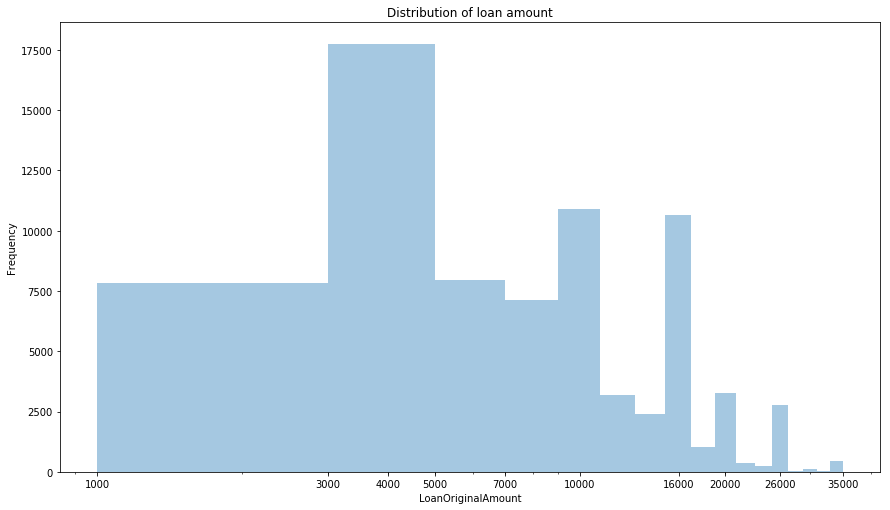

In [46]:
plt.figure(figsize=[14.70, 8.27])
color = sns.color_palette()[0]
bins = np.arange(1000, loan_viz['LoanOriginalAmount'].max() + 2000, 2000)
sns.distplot(loan_viz['LoanOriginalAmount'], bins = bins, kde = False, color = color);
plt.xscale('log')
ticks = [1000, 3000, 4000, 5000, 7000, 10000, 16000, 20000, 26000, 35000]
plt.xticks(ticks, ticks);
plt.title('Distribution of loan amount');
plt.ylabel('Frequency');

OBSERVATION

Distribution of anuual income of borrowers

NB: In cases like this, monthly or annual income should never be used as a ‘yard stick’ to grant loans because there is a possibility that a borrower could be a business owner who pays himself as he pleases and thus, his pay is not a true reflection of the ‘true’ health of his business. From Graph 3, borrowers with income range of 50000 - 74999 were the highest borrowers, followed by borrowers with income range of 25000 – 49999. This highest group of income earners (100000 + and 75000 – 99999) were 3rd and 4th highest borrowers respectively 

Graph 2

what is the distribution of the Occupation of the borrowers?

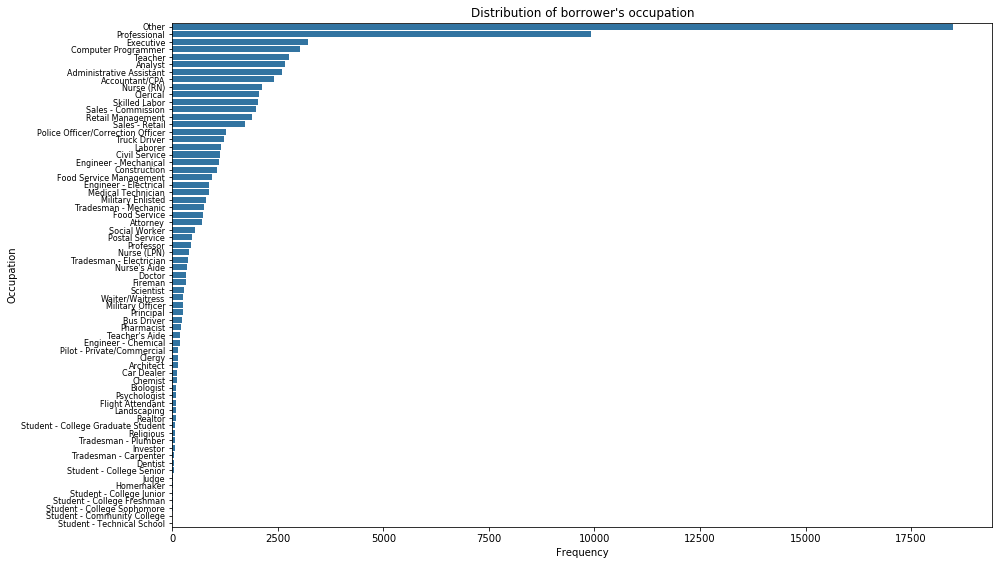

In [55]:
plt.figure(figsize=[14.70, 9.27])
color = sns.color_palette()[0]
order = loan_viz['Occupation'].value_counts()
sns.countplot(data = loan_viz, y = 'Occupation', color = color, order = order.index);
plt.yticks(fontsize = 8);
plt.title("Distribution of borrower's occupation");
plt.xlabel('Frequency');

OBSERVATION

The distribution of the occupation reflects which ‘class’ of workers borrow much. At least, this can help the company in areas like ‘market segmentation’ as the highest class of borrowers could also be the highest class of defaulters. So, this information could aid in ‘marketing’. 

From Graph 2, it shows that the occupations that top the group of borrowers: 

•	Others

•	Professionals

•	Executives

•	Computer programmers 

•	Teachers 

•	Analyst

•	Administrative assistant 

•	Accountant 

•	Nurse 

•	Clerks 

•	Skilled Labourers 


Graph 3

what is the Distribution of anuual income of borrowers?

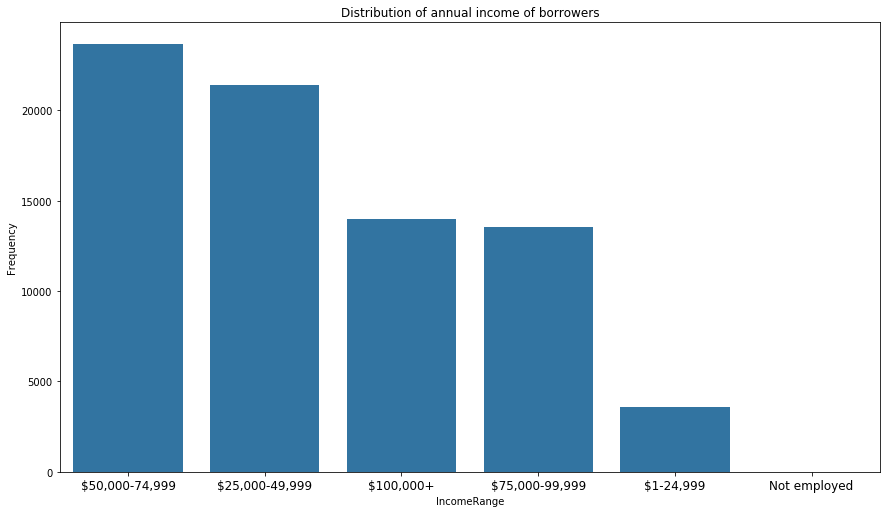

In [56]:
plt.figure(figsize=[14.70, 8.27])
color = sns.color_palette()[0]
order = loan_viz['IncomeRange'].value_counts()
sns.countplot(data = loan_viz, x = 'IncomeRange', color = color, order = order.index);
plt.xticks(fontsize = 12);
plt.ylabel('Frequency');
plt.title('Distribution of annual income of borrowers');

OBSERVATION

NB: In cases like this, monthly or annual income should never be used as a ‘yard stick’ to grant loans because there is a possibility that a borrower could be a business owner who pays himself as he pleases and thus, his pay is not a true reflection of the ‘true’ health of his business. From Graph 3, borrowers with income range of 50000 - 74999 were the highest borrowers, followed by borrowers with income range of 25000 – 49999. This highest group of income earners (100000 + and 75000 – 99999) were 3rd and 4th highest borrowers respectively

Graph 4 -  What is the Distribution of Monthly income of the borrowers? 

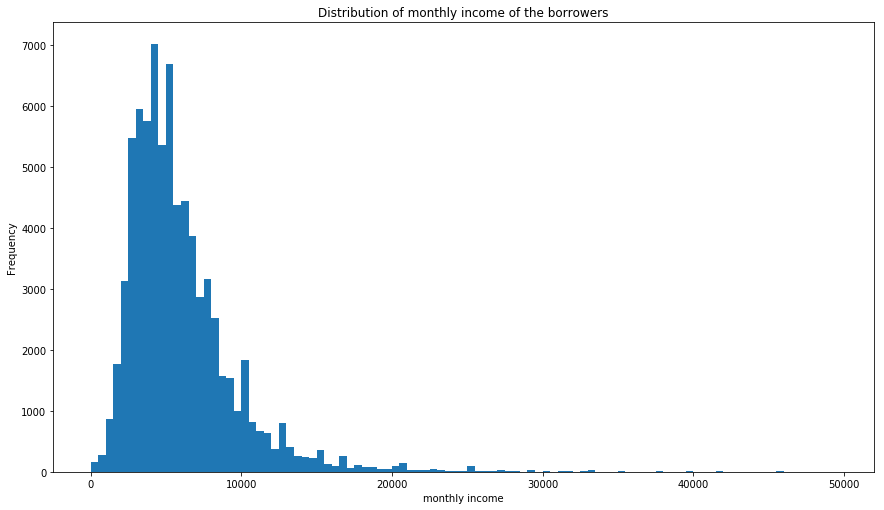

In [57]:
plt.figure(figsize=[14.70, 8.27])
color = sns.color_palette()[0]
bins = np.arange(0, 50000, 500)
plt.hist(data = loan_viz, x = 'StatedMonthlyIncome', bins = bins, color = color);
plt.title('Distribution of monthly income of the borrowers');
plt.xlabel('monthly income');
plt.ylabel('Frequency');

OBSERVATION

The distribution of monthly income is right skewed. Majority of the monthly income is less than 30k with the Monthly income around the 5000 region. The minimum monthly income is 0.25 (which is statistically impossible) while the maximum monthly income is 483333. In my opinoin, this data could have some data gathering issues as a result of the minimum monthly income because no labour pays that small per hour

In [58]:
#Statistic of monthly income
loan_viz['StatedMonthlyIncome'].describe()

count     76216.000000
mean       6002.833586
std        5110.743506
min           0.250000
25%        3583.333333
50%        5041.666667
75%        7250.000000
max      483333.333333
Name: StatedMonthlyIncome, dtype: float64

Graph 5 -Waht is the distribution of ProsperRating (Alpha) assigned to each borrower?

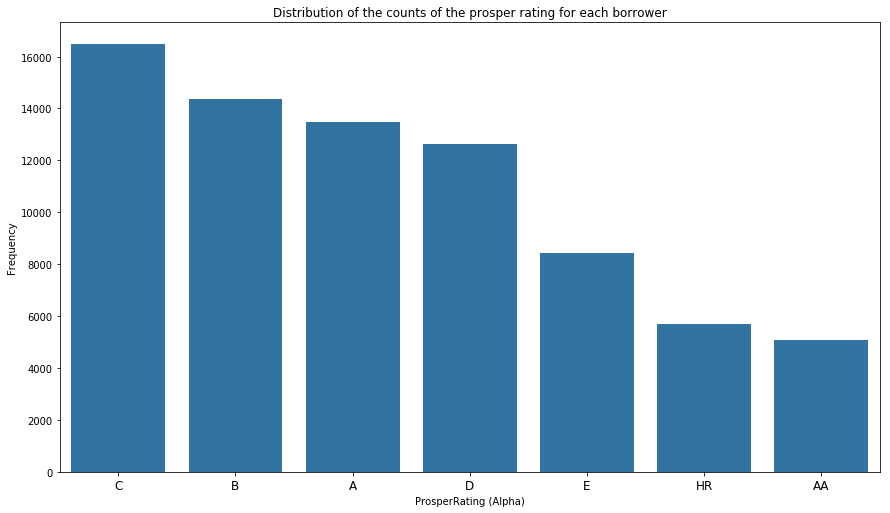

In [59]:
plt.figure(figsize=[14.70, 8.27])
color = sns.color_palette()[0]
order = loan_viz['ProsperRating (Alpha)'].value_counts()
sns.countplot(data = loan_viz, x = 'ProsperRating (Alpha)', color = color, order = order.index);
plt.xticks(fontsize = 12);
plt.ylabel('Frequency');
plt.title('Distribution of the counts of the prosper rating for each borrower');

OBSERVATION

The ratings state the ‘risk’ associated with each borrower. Usually, the higher the rating, the lower the interest rate and vice versa. The ‘credit risk’ associated with borrowers increase down the grade from ‘AA’, ‘A’, ‘B’, ‘C’, ‘D’, ‘E’, ‘HR’. that is to say that, grade ‘AA’ is of least credit risk while grade ‘HR’ is of highest credit risk. 

From graph 5, it is difficult to say if there were more ‘grade C and grade B’ borrowers or if the lending institution granted more loans to ‘grade C and grade B’ borrowers due to the higher interest rates assigned to them.

NOTE: ‘Grade AA’ are the ‘safest’, most credit worthy borrowers. But they were the least borrowers. (more investigation is required to understand why this trend is this way).


Graph 6 

Below I investigate the Distribution of loan terms, employement status, home ownership of the borrowers.


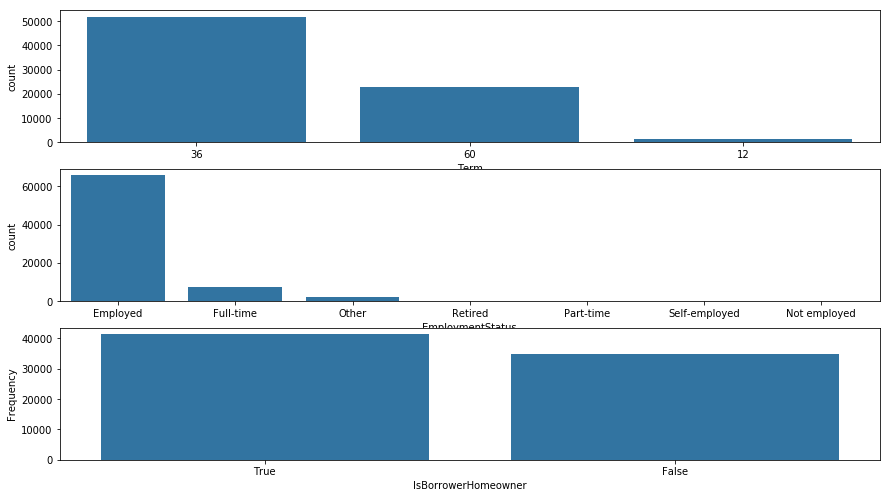

In [67]:
fig, ax = plt.subplots(nrows = 3,figsize=[14.70, 8.27]);
color = sns.color_palette()[0]
order1 = loan_viz['Term'].value_counts()
order2 = loan_viz['EmploymentStatus'].value_counts()
order3 = loan_viz['IsBorrowerHomeowner'].value_counts()
sns.countplot(data = loan_viz, x = 'Term', color = color, order = order1.index, ax = ax[0]);
sns.countplot(data = loan_viz, x = 'EmploymentStatus', color = color, order = order2.index, ax = ax[1]);
sns.countplot(data = loan_viz, x = 'IsBorrowerHomeowner', color = color, order = order3.index, ax = ax[2]);
plt.ylabel('Frequency');

OBSERVATION

According to Prosper’s policy, longer ‘term’ loans (60 months) are granted to ‘business owners’, while shorter term loans (36 months and 12 months) are granted to individual borrowers. 

From the first subplot which is the distribution of loan term, it shows that proper had more individual investors compared to business owners. NOTE: The primary reason for which P2P lending was created for the procurement of 'unsecured individual loans' which might explain why the loan term of 36 and 12 months are more than 60 months. 

From the second subplot, it shows that the management of prosper plays it safe by granting loans to people who are still actively working and can repay their loans since they still earn money. Borrowers who are ‘part-time’ and ‘retired’ workers are granted very little loans. 

The third subplot show borrowers who are home owners. the distribution of home owners and non-home owners are fairly equal. This could pose a potential financial risk in the future for the company 


What is the Distribution of loan defaults?

In [68]:
loan_viz['LoanStatus'].value_counts()

Current                   51170
Completed                 17687
Chargedoff                 4444
Defaulted                   885
Past Due (1-15 days)        714
Past Due (31-60 days)       322
Past Due (91-120 days)      277
Past Due (61-90 days)       275
Past Due (16-30 days)       241
FinalPaymentInProgress      187
Past Due (>120 days)         14
Name: LoanStatus, dtype: int64

In [69]:
loan_viz['LoanStatus'].replace('Past Due (1-15 days)', 'Past Due (0 - 120 days)', inplace= True)
loan_viz['LoanStatus'].replace('Past Due (31-60 days)', 'Past Due (0 - 120 days)', inplace= True)
loan_viz['LoanStatus'].replace('Past Due (91-120 days)', 'Past Due (0 - 120 days)', inplace= True)
loan_viz['LoanStatus'].replace('Past Due (61-90 days)', 'Past Due (0 - 120 days)', inplace= True)
loan_viz['LoanStatus'].replace('Past Due (16-30 days)', 'Past Due (0 - 120 days)', inplace= True)
loan_viz['LoanStatus'].replace('Past Due (>120 days)', 'Past Due (0 - 120 days)', inplace= True)

loan_viz['LoanStatus'].replace('Chargedoff', 'Defaulted', inplace= True)
loan_viz['LoanStatus'].replace('FinalPaymentInProgress', 'Current', inplace = True)

OBSERVATION AND TASK 
I will combine chargedoff loans and defaulted loans together as charged off loans are defaulted loans which the bank management has sort ways to recovere either through the use of a debt collection agency or litigation.

I will replace 'Final payment in progress' with 'Current' since the final payment in progress also represents a current loan

Graph 7 

What is the Distribution of the loan status ?

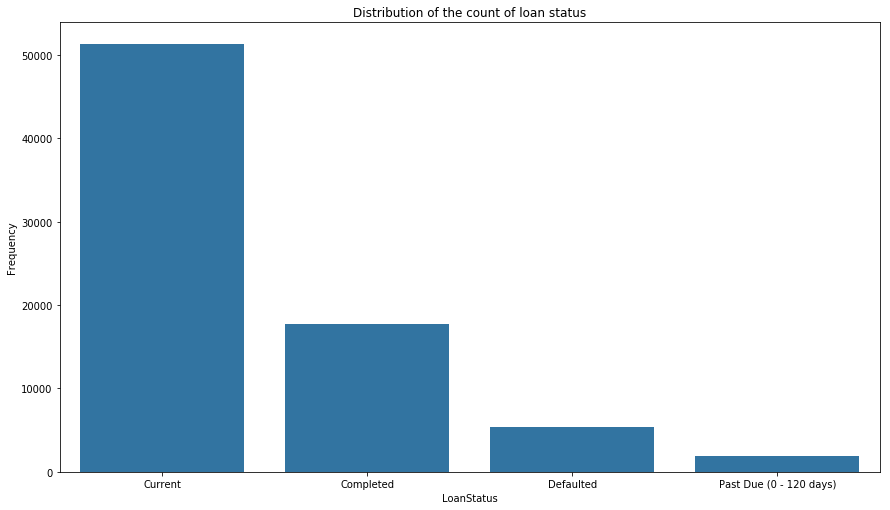

In [70]:
plt.figure(figsize=[14.70, 8.27])
order = loan_viz['LoanStatus'].value_counts()
color = sns.color_palette()[0]
sns.countplot(data = loan_viz, x = 'LoanStatus', color = color, order = order.index);
plt.title('Distribution of the count of loan status');
plt.ylabel('Frequency');

From graph 7 above, it shows that Prosper has a strong management and implements policy that checkmates against defaulting borrowers. This is evident in the graph as the number of defaulted loans and loans past due combined are a mere 7172 observation which is a mere 9.41% of the total observation. 

What is the percentage Distribution of loan defaults?

In [71]:
#Percentage of defaulted loans and loans past due
(loan_viz['LoanStatus'].value_counts()['Defaulted'] + loan_viz['LoanStatus'].value_counts()['Past Due (0 - 120 days)'])/ loan_viz.shape[0]

0.09410097617298205

Pop up questions 

Were there any scale transformations? Were there any unusal features that were spotted or trends that were observed? 

The histogram showing the distribution of loan amount required some trasformation using a log scale in order to show the values with highest distributions. 

the monthly income showed a rather 'unimaginable' minimum amount. The minimum monthly income was $0.25 which is quite impossible to earn. This could be attributed to poor 'data gathering' process. 

The distribution of 'Occupation' status showed that the occupation 'other' borrowered more than other 'specialist'. unfortunately, 'others' makes no sense as it is an unidentifiable occupation title. so it is difficult to tell which occupation that is. 

The prosper rating shows that borrowers with loan grades of, 'C', 'B', 'A', 'D', obtained the highest amount of loans

There is a prosper rating and a prosper score both of which are supposed to be being marks to knowing credit worthy and credit-unworthy borrowers. Having two bench marks could be confusing - so my point is that prosper should adopt just one. 

The number of defaulted loans and loans past due combined are 7172 observation which is a mere 9.41% of the total observation. This shows that the management of Proper is risk averse

BIVARIATE VISUALIZATION

Graph 8

What is the correlation amongs numeric variables?

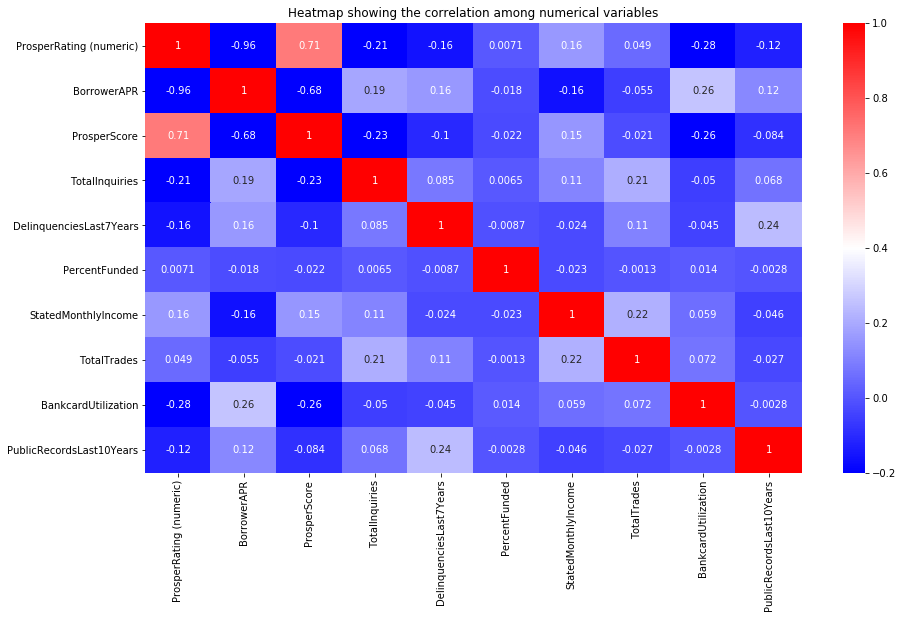

In [73]:
loan_heat = loan_clean.filter(['ProsperRating (numeric)', 'BorrowerAPR', 'ProsperScore', 'TotalInquiries', 'DelinquenciesLast7Years', 
                              'PercentFunded', 'StatedMonthlyIncome', 'TotalTrades', 'BankcardUtilization', 'PublicRecordsLast10Years'])
plt.figure(figsize=[14.70, 8.27])
sns.heatmap(loan_heat.corr(), annot = True, cmap = 'bwr', vmin = -0.2, vmax = 1);
plt.title('Heatmap showing the correlation among numerical variables');

OBSERVATION

From the heat map in graph 8 above, one salient relationship from the heat map above is:

Prosper rating vs prosper score: There seem to be a strong positive correlation between them. Prosper rating is generated using the FICO score while the prosper score is generated using an algorithm. But in the end, they are fairly similar.

In general, all of the data (except proper rating vs prosper score stated above) have a weak negative and weak positive relationship of within the range of 0 and 0.3 on the positive and 0 to -0.25 on the negative side. 


Graph 9 - What is the graphical representation of the above variables?

<Figure size 1058.4x595.44 with 0 Axes>

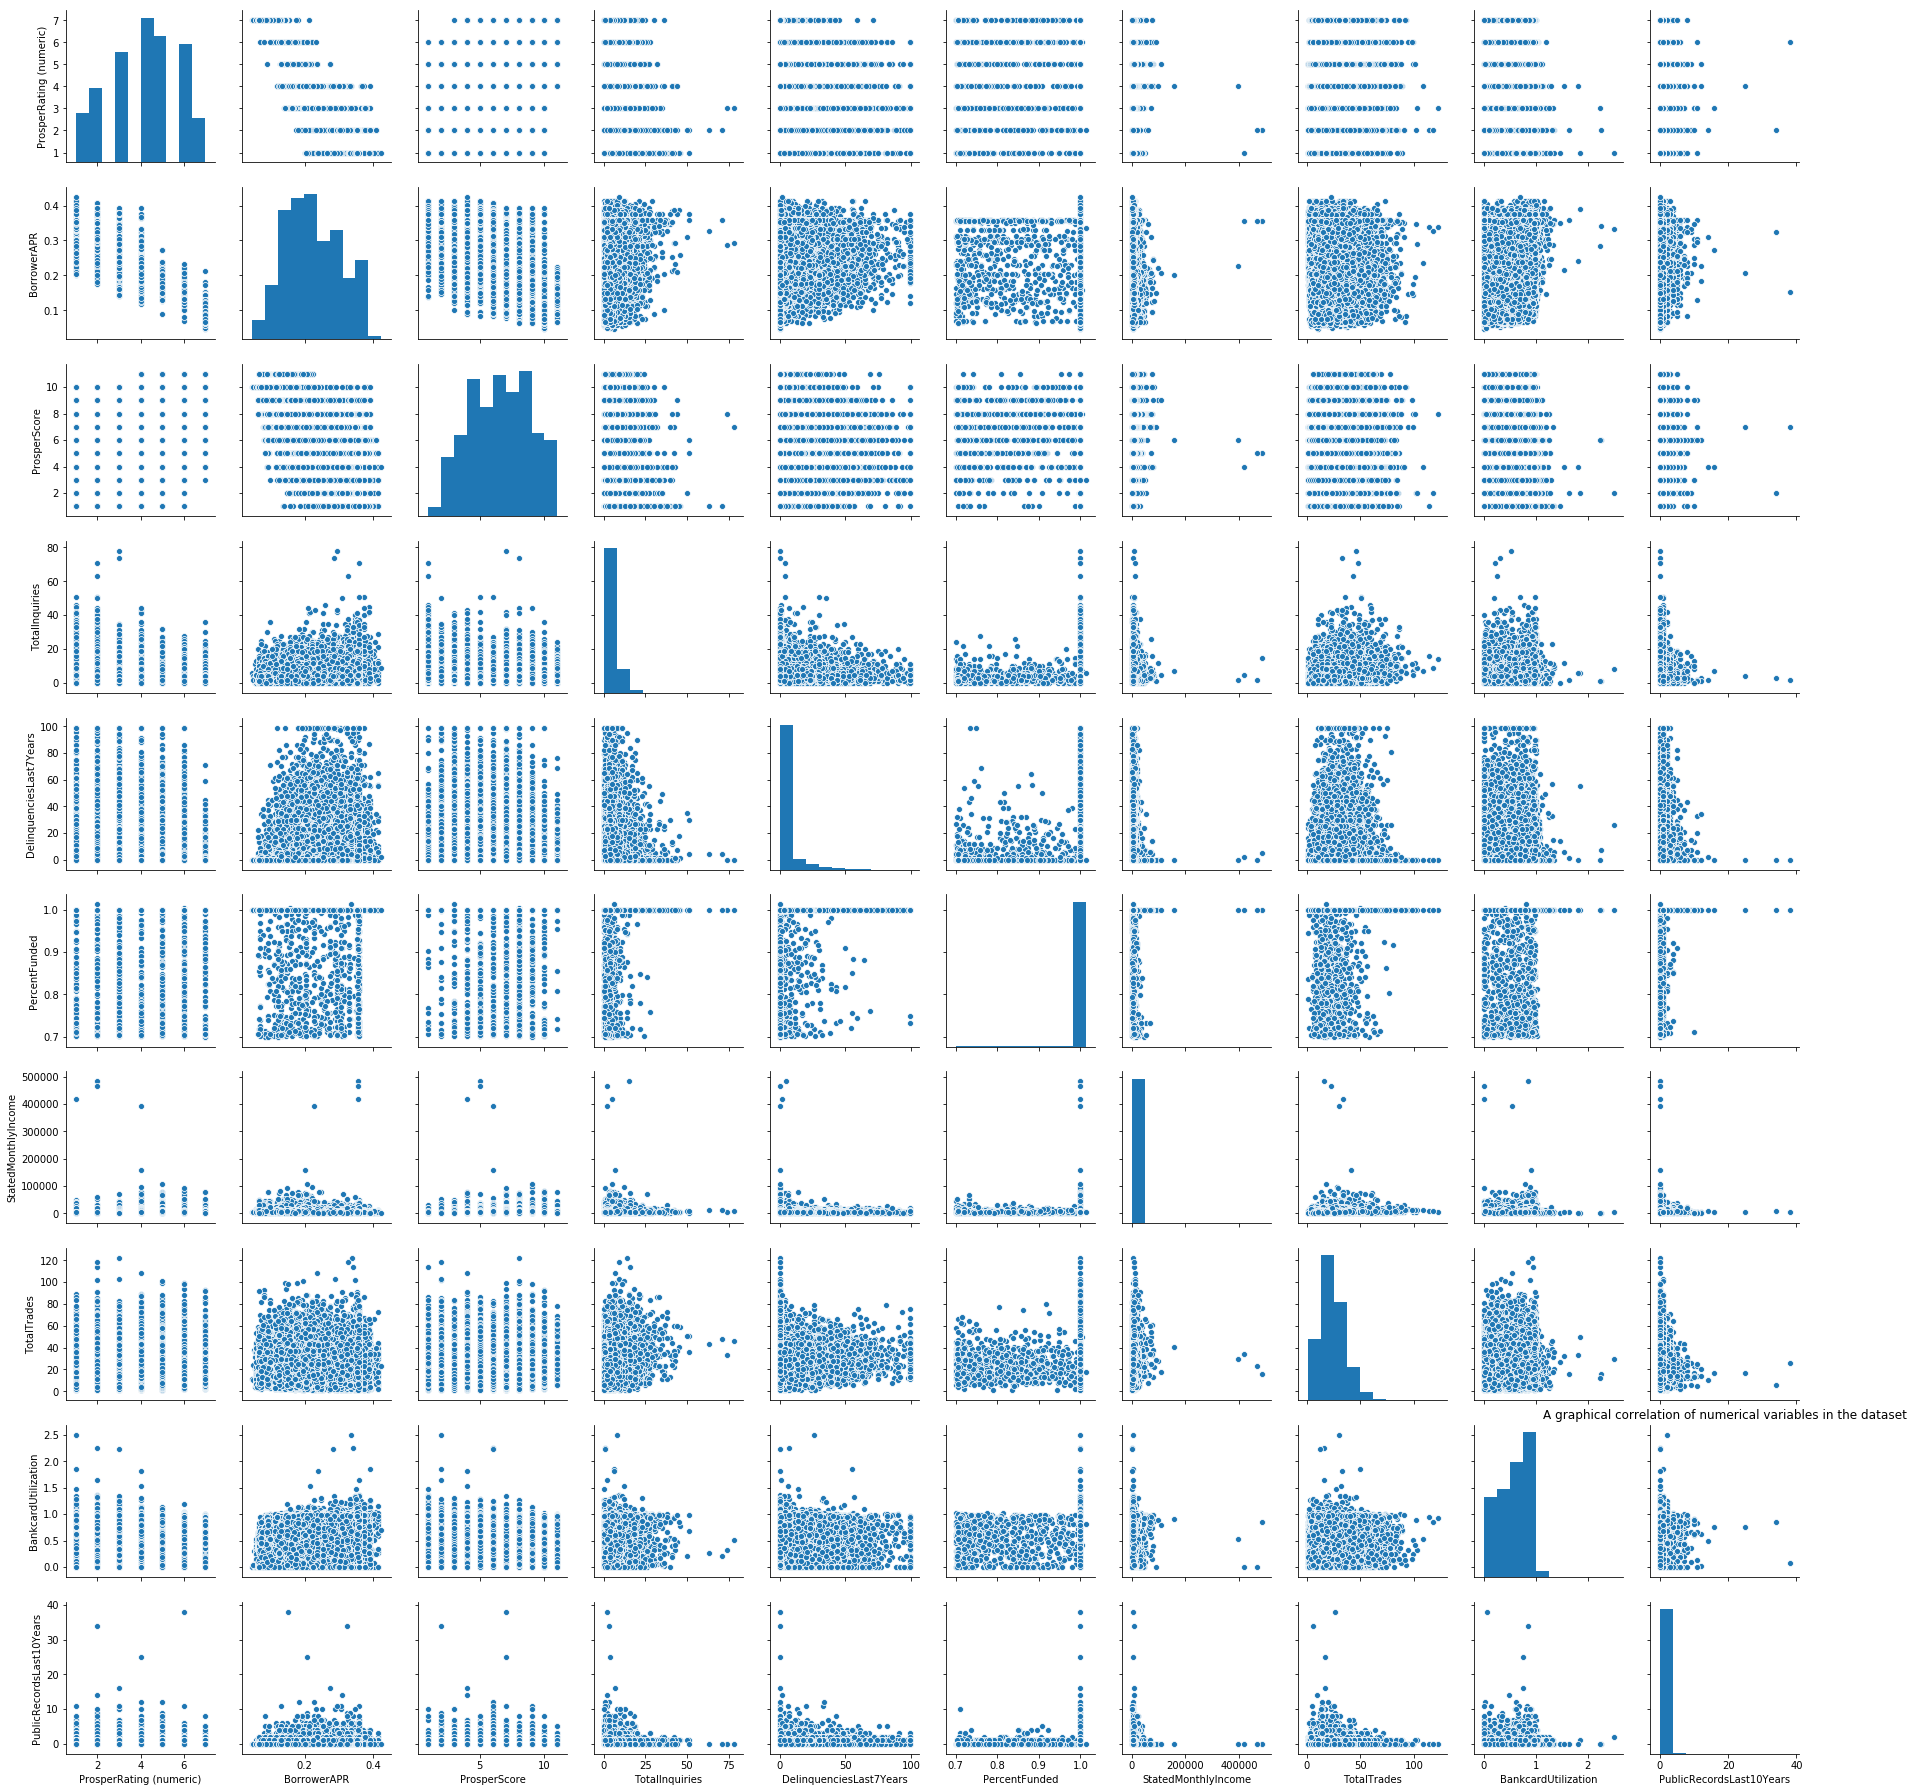

In [74]:
plt.figure(figsize=[14.70, 8.27]);
sns.pairplot(data = loan_heat);
plt.title('A graphical correlation of numerical variables in the dataset');

OBSERVATION

From the graphical representation of the heat map as shown above, it shows that some of the variables are discrete which makes determining a trend/relationship difficult

Relationship beetween categorical variables and numerical variables

Graph 10 - What is the Distribution of loan status according to the EmploymentStatus of the borrowers?

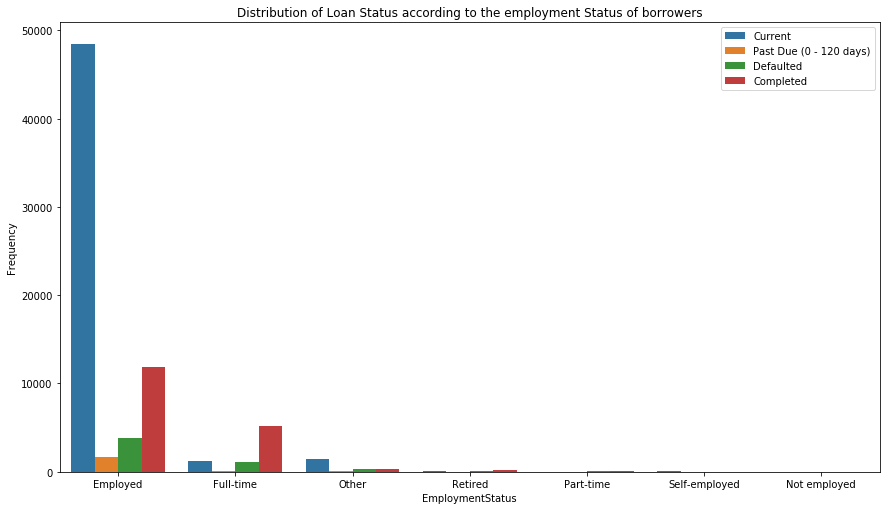

In [75]:
plt.figure(figsize=[14.70, 8.27])
order = loan_viz.groupby('EmploymentStatus')['LoanStatus'].count().reset_index(name = 'LoanStatus').sort_values(by = 'LoanStatus', ascending = False)
sns.countplot(data = loan_viz, x = 'EmploymentStatus', hue = 'LoanStatus', order = order['EmploymentStatus']);
plt.legend(bbox_to_anchor = (1, 1), ncol = 1, loc = 1);
plt.title('Distribution of Loan Status according to the employment Status of borrowers')
plt.ylabel('Frequency');

OBSERVATION

From the above, it shows that there are more employed staff who are granted loans compared to borrowers of other employement status. As expected, the default is more from the 'employed' category because it has more count of borrowers

Graph 11 - What is the distribution of defaults loan status according to borrowerstate?

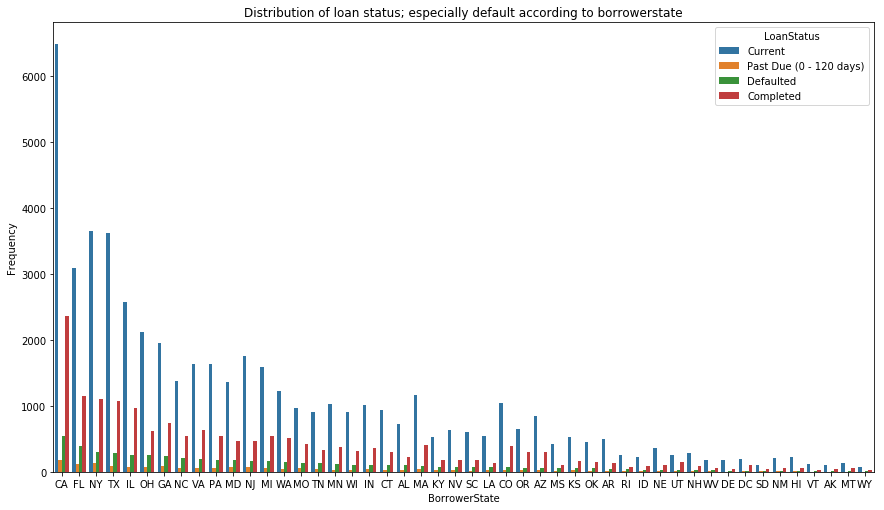

In [76]:
plt.figure(figsize=[14.70, 8.27])
loan_viz_default = loan_viz.query("LoanStatus == 'Defaulted'")
order = loan_viz_default.groupby('BorrowerState')['LoanStatus'].count().reset_index(name = 'LoanStatus').sort_values(by = 'LoanStatus', ascending = False)
sns.countplot(data = loan_viz, x = 'BorrowerState', hue = 'LoanStatus', order = order['BorrowerState']);
plt.title('Distribution of loan status; especially default according to borrowerstate')
plt.ylabel('Frequency');

OBSERVATION
From graph 10, it shows that ‘loan defaults’ is not ‘proportional’ to the number of loan borrowers. In some states, the graph shows that most states with a lesser number of borrowers defaulted more than states with a higher number of borrowers. 
In my opinion, states with a low ‘current’ to ‘defaulted’ ratios should be tagged ‘problematic’ states because it means that the ‘default’ rates are really high in those states. 

Also From the above graph, it is difficult to say which state has the 'most favorable' category of borrowers. The data is really quite complex to understand just the way it is. So, a feature engineering shall be done below to plot there Current_default_ratio (that is 'total count of current'/ 'total count of default')

Graph 12- What is the Distribution of Current_default ratio for each state?

In [77]:
current = loan_viz.query('LoanStatus == "Current"')
default = loan_viz.query('LoanStatus == "Defaulted"')

In [78]:
current_default_ratio = (current.groupby('BorrowerState')['LoanStatus'].count() / default.groupby('BorrowerState')['LoanStatus'].count()).reset_index().sort_values(by = 'LoanStatus', ascending = False)
#current_default_ratio

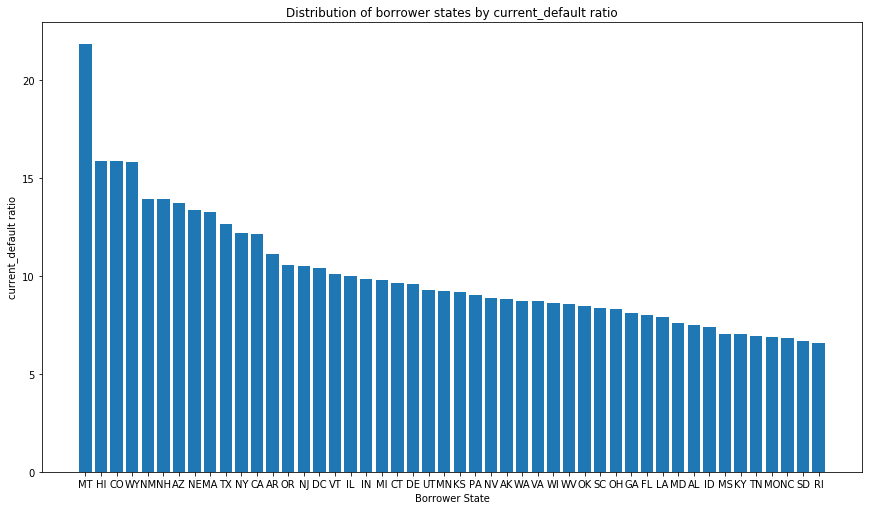

In [79]:
plt.figure(figsize=[14.70, 8.27]);
plt.bar(x = current_default_ratio['BorrowerState'], height = current_default_ratio['LoanStatus']);
plt.xticks(fontsize = 10);
plt.title('Distribution of borrower states by current_default ratio')
plt.ylabel('current_default ratio');
plt.xlabel('Borrower State');



OBSERVATION

From the graph, it shows that states which attracts less risks of defaults, includes:

Mt – Montana
HI – Hawaii
CO – Colorado
WY – Wyoming
NM - New Mexico
NH - New Hampshire
AZ – Arizona
NE - Nebraska
MA – Massachusetts
TX – Texas
NY – New York City
CA – California
AR – Arkansas
OR – Orlando
NJ - New Jersey
DC – Washington DC
VT - Vermont
IL – Illinois
IN – Indiana NOTE: The above states have high current_default ratio
States which pose a high default risk, in order of severity includes:

RI – Rhode Island
SD – South Dakota
NC – North Carolina
MO – Missouri
TN – Tennessee
KY – Kentucky
MS – Mississippi
ID – Idaho
AL – Alabama
MD – Maryland
LA – Los Angeles
FL – Florida

Graph 13 - What is the Distribution of loan status by loan term ?

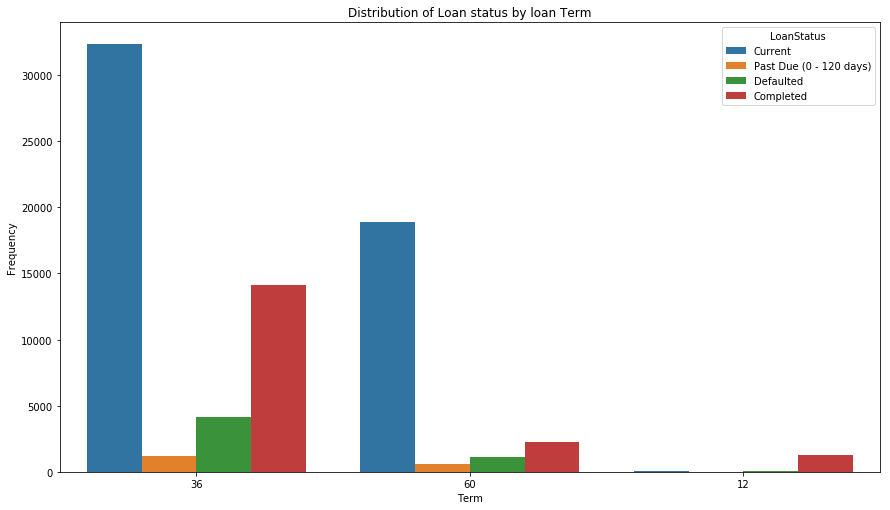

In [80]:
plt.figure(figsize=[14.70, 8.27])
order = loan_viz['Term'].value_counts()
sns.countplot(data = loan_viz, x = 'Term', hue = 'LoanStatus', order = order.index);
plt.title('Distribution of Loan status by loan Term')
plt.ylabel('Frequency');

OBSERVATION

From the graph, borrowers with loan status of 36months perform better than borrowers with loan status of 60 months. In this case, it is difficult to say if there are more individual borrowers compared to borrowers who seeks 60 months loan (business owners), or individual borrowers are more favoured. 

Graph 14 - what is the Distribution of loan status against loan grade/ Prosper rating?

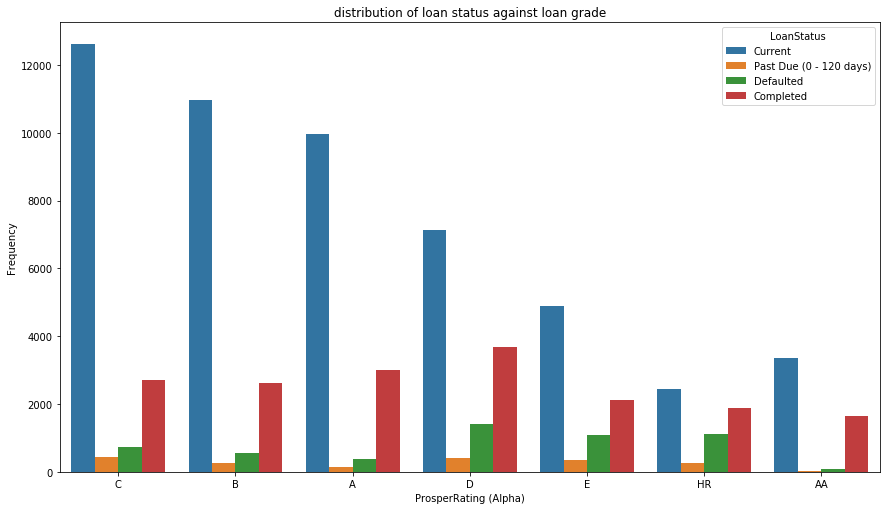

In [81]:
plt.figure(figsize=[14.70, 8.27])
loan_default = loan_viz.query('LoanStatus == "Defaulted"')
order = loan_viz['ProsperRating (Alpha)'].value_counts()
sns.countplot(data = loan_viz, x = 'ProsperRating (Alpha)', hue = 'LoanStatus', order = order.index);
plt.title('distribution of loan status against loan grade')
plt.ylabel('Frequency');

OBSERVATION

It is quite difficult to tell what relationship exist in the above graph. And so, I will feature engineer it and plot a conclusive graph in graph 14 below

Graph 15 - What is thee current_plus_completed_default_ratio vs Prosper loan rating ?

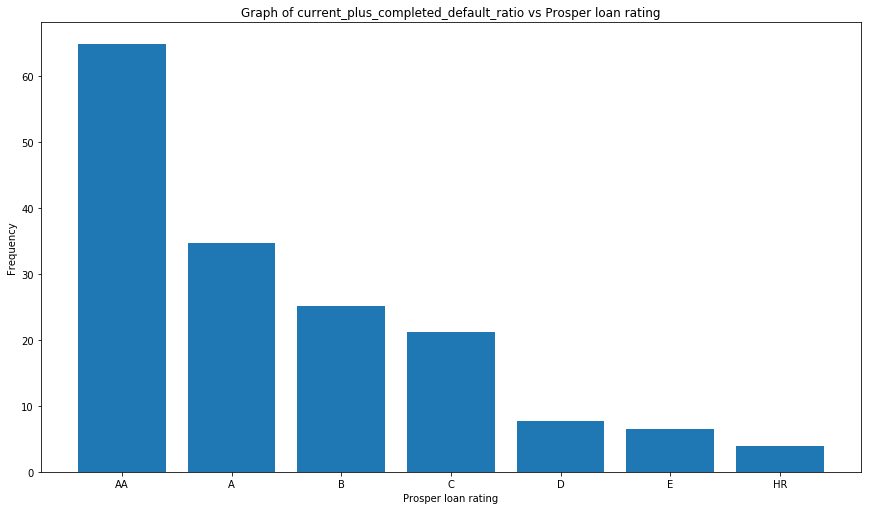

In [82]:
#create new data frames
current = loan_viz.query('LoanStatus == "Current"')
completed  = loan_viz.query('LoanStatus == "Completed"')
default = loan_viz.query('LoanStatus == "Defaulted"')

#Below we get the ((current + completed)  + (default)) ratio; otherwise called current_completed_default ratio
current_plus_completed_default_ratio = (current.groupby('ProsperRating (Alpha)')['LoanStatus'].count() + completed.groupby('ProsperRating (Alpha)')['LoanStatus'].count()) / default.groupby('ProsperRating (Alpha)')['LoanStatus'].count()

current_plus_completed_default_ratio = current_plus_completed_default_ratio.reset_index().sort_values(by = 'LoanStatus', ascending = False)

#Graph of the Current_plus_completed_default_ratio per ProsperRating (Alpha)
plt.figure(figsize=[14.70, 8.27])
plt.bar(x = current_plus_completed_default_ratio['ProsperRating (Alpha)'], height= current_plus_completed_default_ratio['LoanStatus']);
plt.title('Graph of current_plus_completed_default_ratio vs Prosper loan rating');
plt.xlabel('Prosper loan rating');
plt.ylabel('Frequency');

OBSERVATION

Graph 15 is ‘feature engineering’ of graph 14. Here, I calculated the ratio of (current + completed) loans / defaulted loans. this way, it would be a lot easier to see which rating performs better than the other. 
From the graph 14, it shows that the management of Prosper displayed good management practices. Because the ratio shows that the algorithm behind the ‘prosper rating’ has a high precision and accuracy. The credit risk does indeed decrease down the ratings and vice versa. 


Graph 16 - What is the current_plus_completed_default_ratio vs Occupation ?
Which occupation(s) ranks as safest for the bank (prosper) and which occupation pose huge financial risks for prosper?

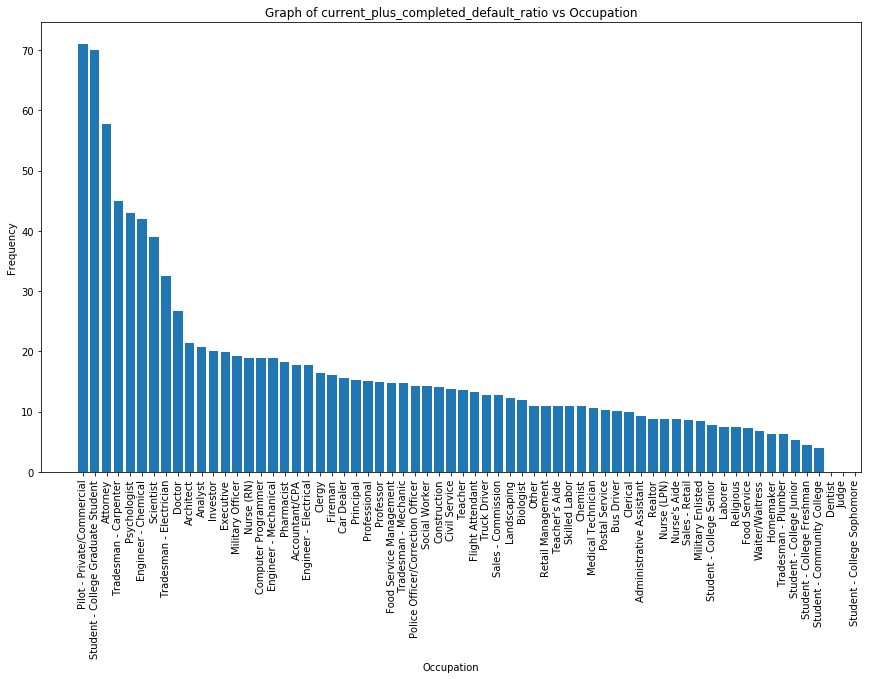

In [83]:
#create new data frames
current = loan_viz.query('LoanStatus == "Current"')
completed  = loan_viz.query('LoanStatus == "Completed"')
default = loan_viz.query('LoanStatus == "Defaulted"')

#Below we get the ((current + completed)  + (default)) ratio; otherwise called current_completed_default ratio
current_plus_completed_default_ratio = (current.groupby('Occupation')['LoanStatus'].count() + completed.groupby('Occupation')['LoanStatus'].count()) / default.groupby('Occupation')['LoanStatus'].count()

current_plus_completed_default_ratio = current_plus_completed_default_ratio.reset_index().sort_values(by = 'LoanStatus', ascending = False)

#Graph of the Current_plus_completed_default_ratio per ProsperRating (Alpha)
plt.figure(figsize=[14.70, 8.27])
plt.bar(x = current_plus_completed_default_ratio['Occupation'], height= current_plus_completed_default_ratio['LoanStatus']);
plt.title('Graph of current_plus_completed_default_ratio vs Occupation');
plt.xlabel('Occupation');
plt.ylabel('Frequency');
plt.xticks(rotation = 90);


OBSERVATION

Graph 16 shows the Occupations to which borrowers are less likely to default. From the graph, we can see that the best professions in order of less financial risks are: 
1.	Pilots
2.	Student – college graduates
3.	Attorney 
4.	Tradesman/Carpenter
5.	Psychologist 
6.	Engineer – Chemical
7.	Scientist 
8.	Tradesman – Electrician 
9.	Doctor 
10.	Architect
11.	Analyst 
12.	Investor 
13.	Executive 
14.	Military officer 
15.	Nurse 
16.	Computer Programmer
17.	Engineer – mechanical 
Most risky occupations with a strong likelihood to default include: 
1.	Students – community college 
2.	Students – college freshman 
3.	Students – college junior 
4.	Tradesman – Plumber 
5.	Homemaker 
6.	Waiter/waitress
7.	Food service 
8.	Religious 
9.	Labourer 
10.	Student – college senior 
11.	Military enlisted 
12.	Sales – retail 
13.	Nurse’s Aide


MULTIVARIATE DISTRIBUTION

Graph 17 - What is the relationsip between Loan status against Borrower annual percentage rate and monthly income ?

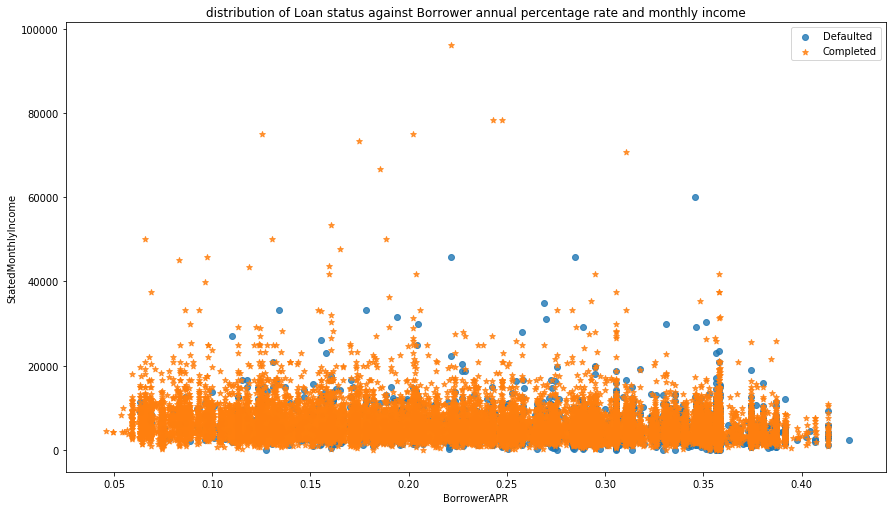

In [84]:
ttype = [['Defaulted', 'o'], ['Completed', '*']]

plt.figure(figsize=[14.70, 8.27])
for status, marker in ttype:
    loan_df = loan_viz[loan_viz['LoanStatus'] == status]
    df = loan_df.query('StatedMonthlyIncome  < 100000')
    sns.regplot(data = df, x = 'BorrowerAPR', y = 'StatedMonthlyIncome', marker = marker, fit_reg = False);
    
plt.title('distribution of Loan status against Borrower annual percentage rate and monthly income');
plt.legend(['Defaulted', 'Completed']);

OBSERVATION

From graph 17, it is quite difficult to tell from range of monthly income the defaults are highest as both the loan status of ‘completed’ and the loan status of ‘defaulted’ cluster are the same points within the same range. 

Graph 18 -what is the relationship between Loan status against Borrower annual percentage rate and monthly income ?

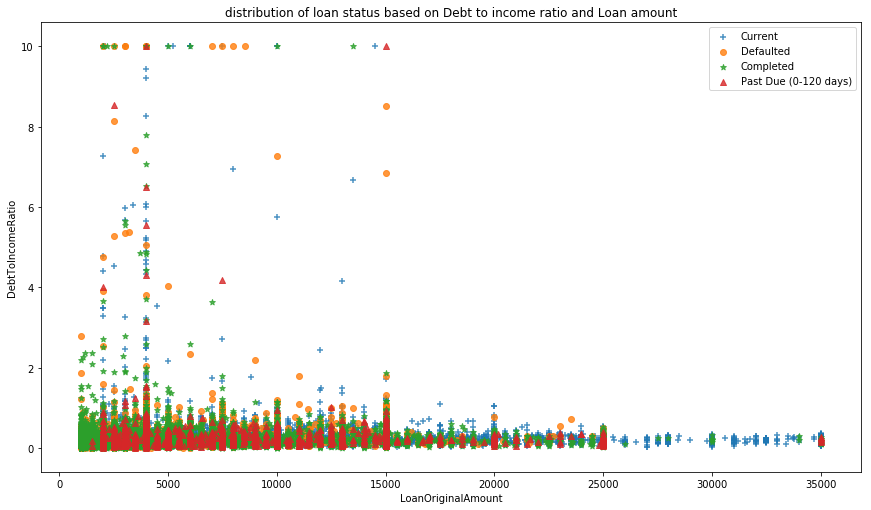

In [85]:
ttype = [['Current', '+'], ['Defaulted', 'o'], ['Completed', '*'], ['Past Due (0 - 120 days)', '^']]

plt.figure(figsize=[14.70, 8.27])
for status, marker in ttype:
    loan_df = loan_viz[loan_viz['LoanStatus'] == status]
    sns.regplot(data = loan_df, x = 'LoanOriginalAmount', y = 'DebtToIncomeRatio', marker = marker, fit_reg = False);
    
plt.title('distribution of loan status based on Debt to income ratio and Loan amount');
plt.legend(['Current', 'Defaulted', 'Completed', 'Past Due (0-120 days)']);

OBSERVATION 

Graph 17 - Plot of Loan status against Borrower annual percentage rate and monthly income
Once again, the major interest is the default rate. One significant observation shows that ‘all loan amount greater 25, 000’ has no defaults. 
So, it could mean that borrowers who borrow in this range do not default while borrowers who borrow below 25000 actually will default. (this requires further investigation)